In [2]:
from astroquery.gaia import Gaia

# Example query for stars in a specific region of sky
query = """
SELECT source_id, ra, dec, phot_g_mean_mag
FROM gaiadr3.gaia_source
WHERE ra BETWEEN 88 AND 92 AND dec BETWEEN 22 AND 26
AND phot_g_mean_mag < 18
"""

job = Gaia.launch_job(query)
results = job.get_results()

Sample of retrieved data:
     source_id              ra                dec         phot_g_mean_mag
                           deg                deg               mag      
------------------- ----------------- ------------------- ---------------
3011968416163350272 86.93912852502406  -9.669607137549677       2.0778263
3220756843825383936 83.00165624929525 -0.2990788925812489       2.2487726
3017190546641718144 83.85826322361507  -5.909896048091421       2.7408419
3337991583943473280 83.78449673650563   9.934150110721673        3.528103
3214077516844988800 81.11923705133687 -2.3971524975189644       3.6153696


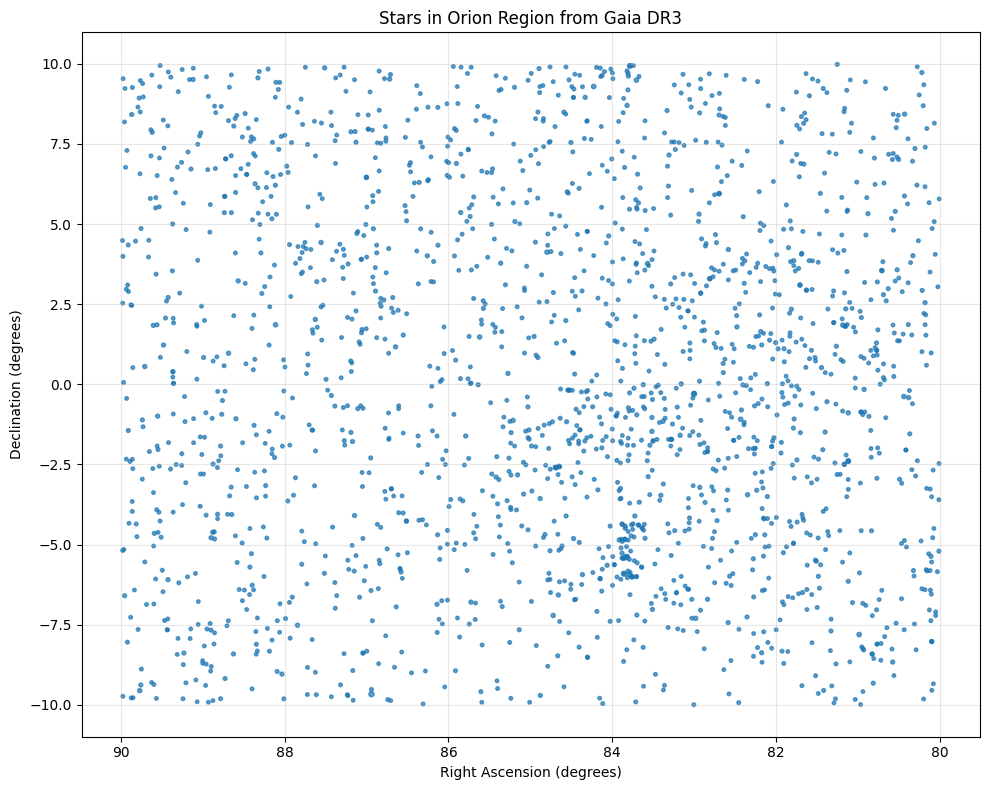

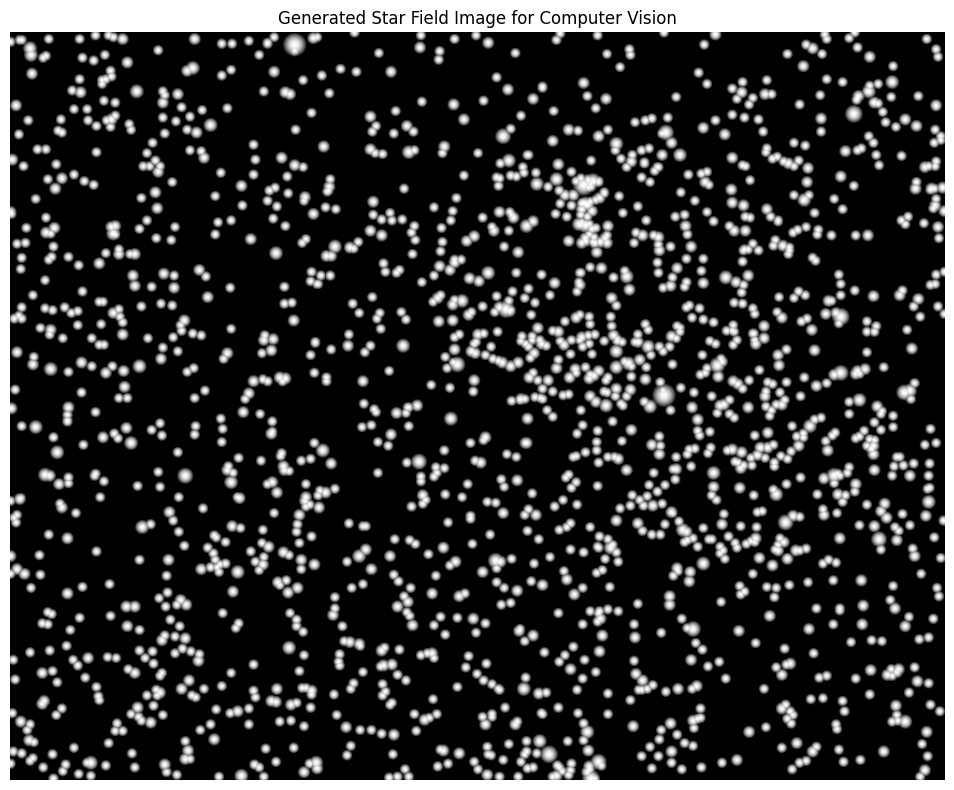

Total stars retrieved: 2000


In [3]:
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
import numpy as np

# Configure Gaia (optional but recommended)
Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"  # Use Data Release 3
Gaia.ROW_LIMIT = 5000  # Limit results to prevent timeout

# Query for stars in the region of Orion constellation
query = """
SELECT source_id, ra, dec, phot_g_mean_mag
FROM gaiadr3.gaia_source
WHERE ra BETWEEN 80 AND 90 AND dec BETWEEN -10 AND 10
AND phot_g_mean_mag < 16
ORDER BY phot_g_mean_mag ASC
"""

# Execute the query
job = Gaia.launch_job(query)
results = job.get_results()

# Display the first few rows of the data
print("Sample of retrieved data:")
print(results[:5])

# Plot the stars
plt.figure(figsize=(10, 8))
plt.scatter(results['ra'], results['dec'], 
            s=20/np.sqrt(results['phot_g_mean_mag']),  # Size based on brightness
            alpha=0.7)
plt.gca().invert_xaxis()  # Astronomical convention
plt.title('Stars in Orion Region from Gaia DR3')
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create a simple 2D image representation for computer vision
# Define image dimensions
width, height = 1000, 800
image = np.zeros((height, width))

# Convert RA/Dec to pixel coordinates
x = width - ((results['ra'] - min(results['ra'])) / (max(results['ra']) - min(results['ra'])) * width)
y = (results['dec'] - min(results['dec'])) / (max(results['dec']) - min(results['dec'])) * height

# Plot stars as bright points on the image
for i in range(len(results)):
    # Calculate brightness (brighter stars = larger radius)
    brightness = 20 / np.sqrt(results['phot_g_mean_mag'][i])
    brightness = int(max(1, min(20, brightness)))  # Limit size
    
    # Convert to integer pixel coordinates
    xi, yi = int(x[i]), int(y[i])
    
    # Check boundaries
    if 0 <= xi < width and 0 <= yi < height:
        # Add a bright spot at star location
        image[yi, xi] = 255
        
        # For brighter stars, make them larger
        for dx in range(-brightness, brightness+1):
            for dy in range(-brightness, brightness+1):
                if (dx**2 + dy**2) <= brightness**2:  # Circular shape
                    nx, ny = xi+dx, yi+dy
                    if 0 <= nx < width and 0 <= ny < height:
                        image[ny, nx] = max(image[ny, nx], 
                                           255 * (1 - (dx**2 + dy**2)/brightness**2))

# Display the generated image
plt.figure(figsize=(10, 8))
plt.imshow(image, cmap='gray')
plt.title('Generated Star Field Image for Computer Vision')
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Total stars retrieved: {len(results)}")